Problem: Predict the likelihood of Parkinson's disease based on voice measurements.
Assumptions: ["All features except 'name' contribute to predictions.", 'Dataset is balanced and well-labeled.']
Current Solution: Manual diagnosis by specialists.
Benefits of Model: Early and accurate predictions to support healthcare decisions.
===== Exploratory Data Analysis =====

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    fl

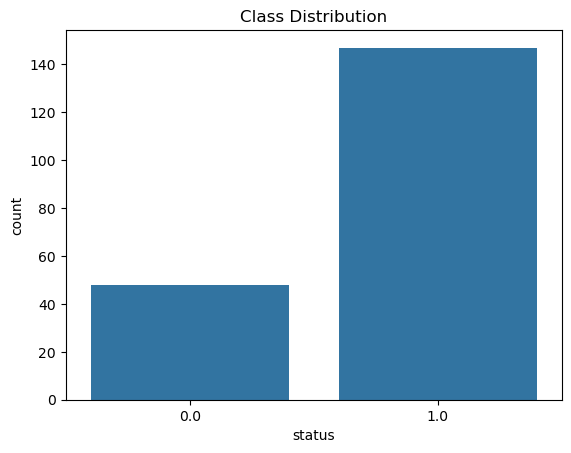


===== Univariate Analysis =====


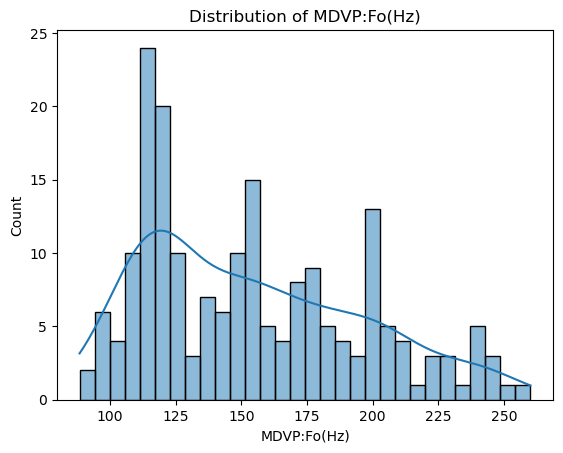

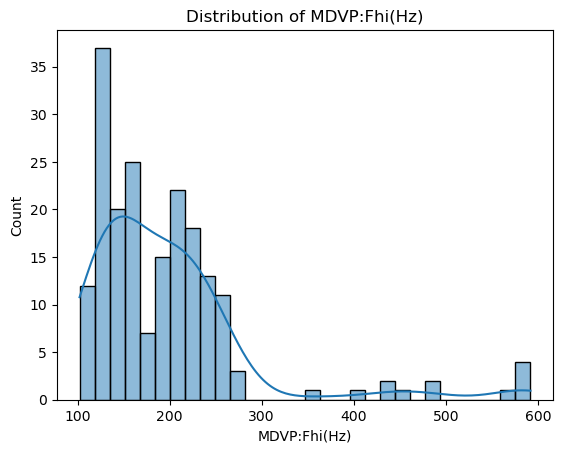

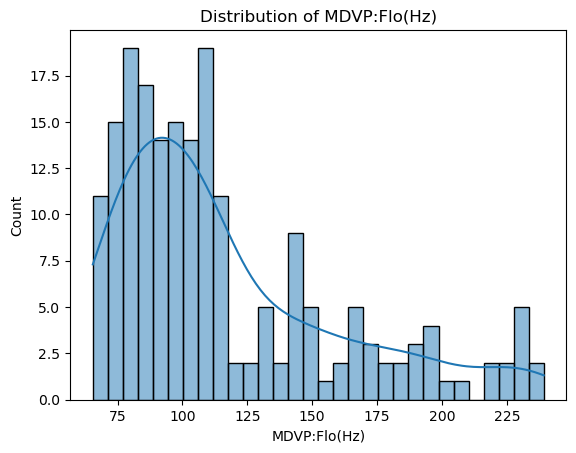

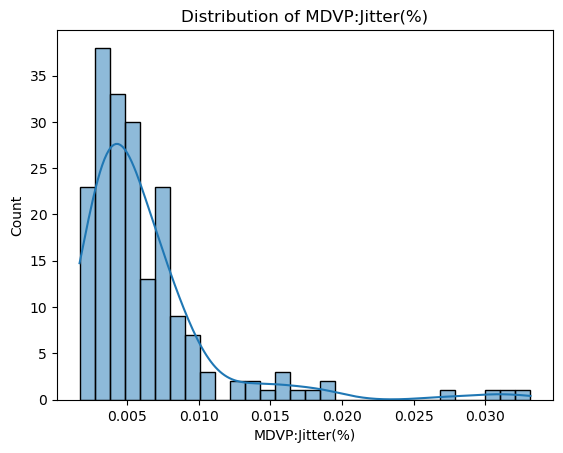

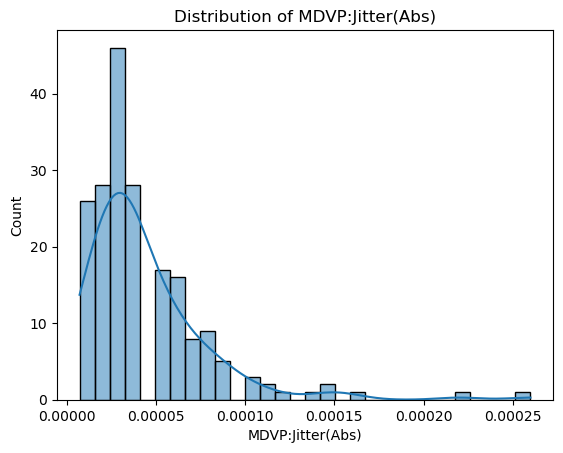

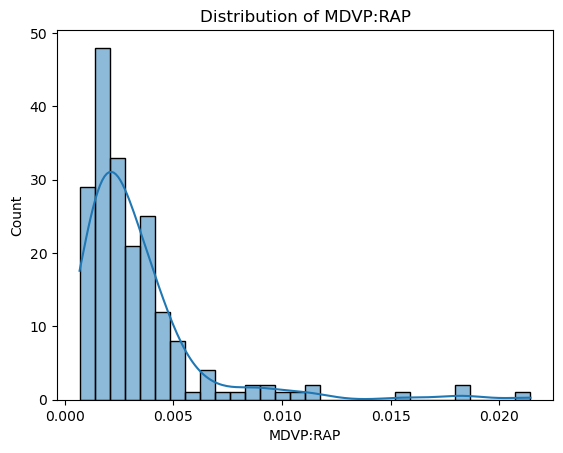

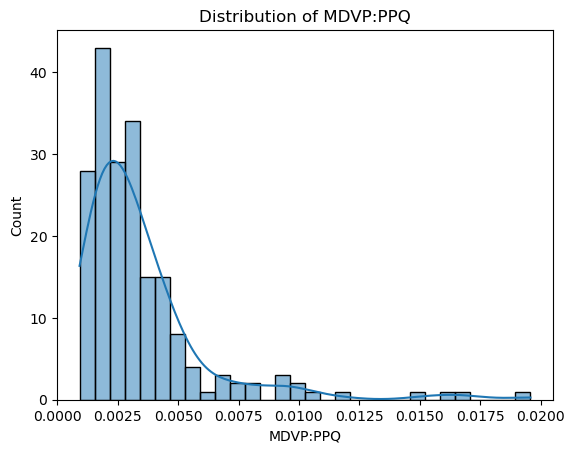

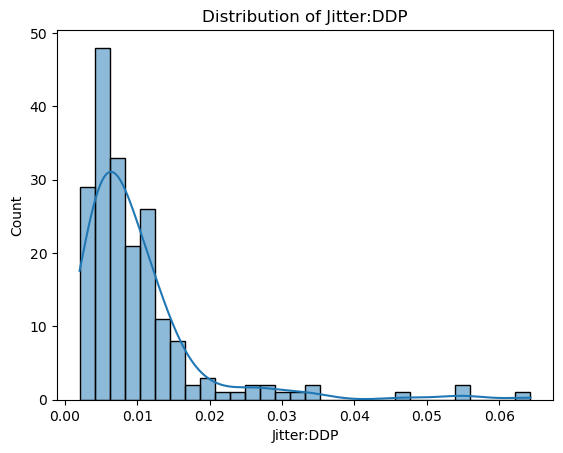

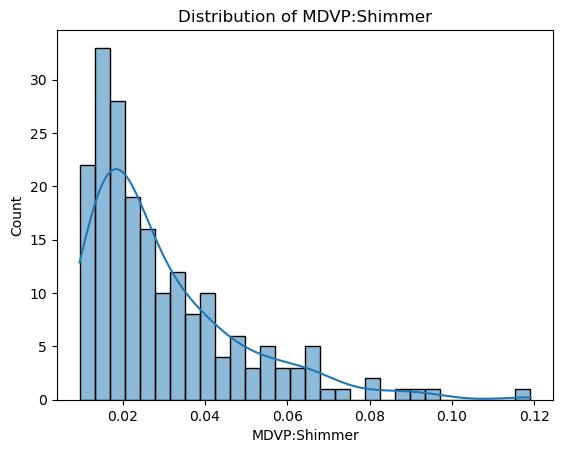

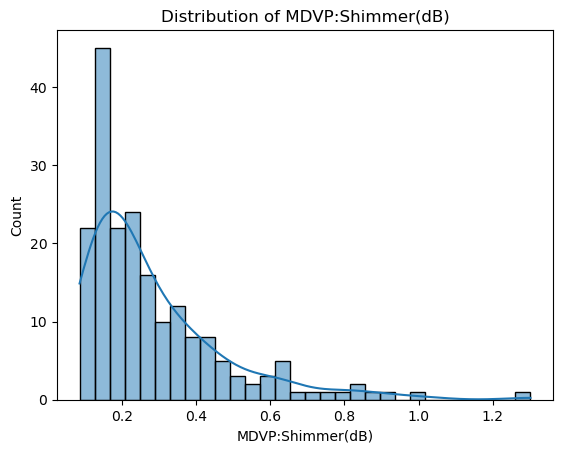

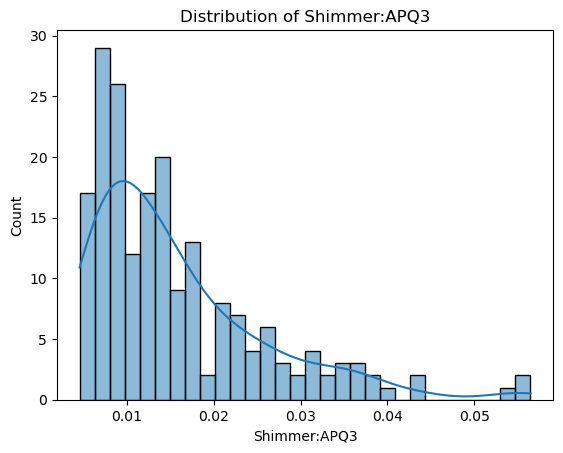

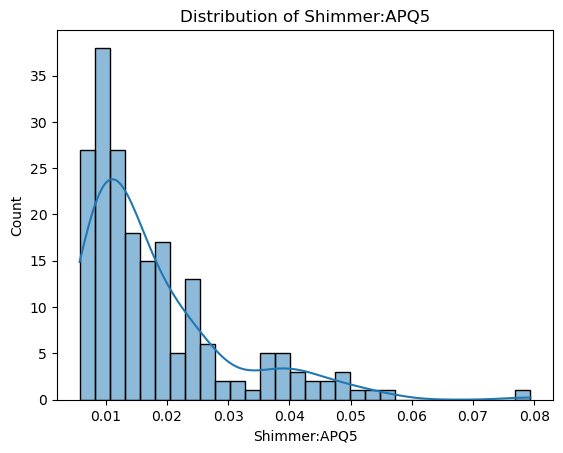

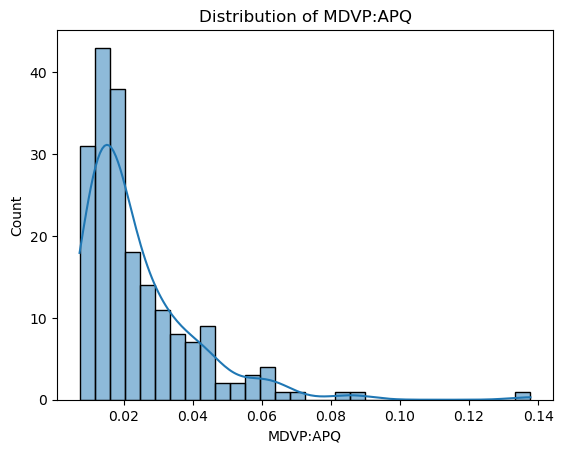

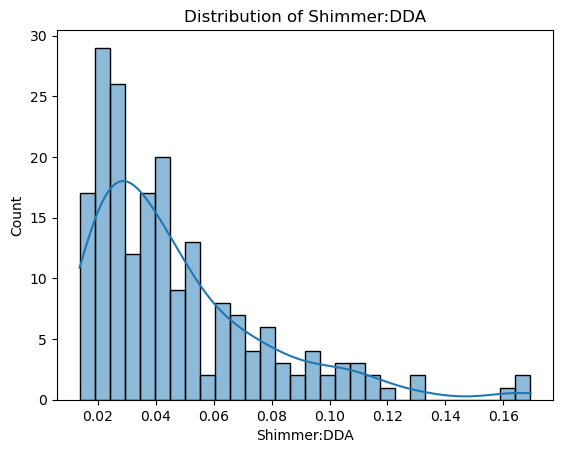

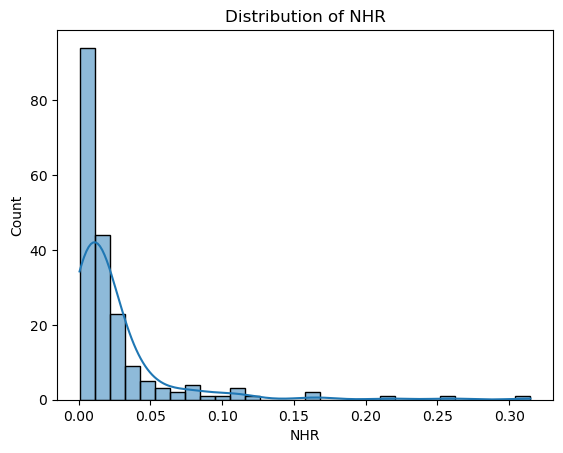

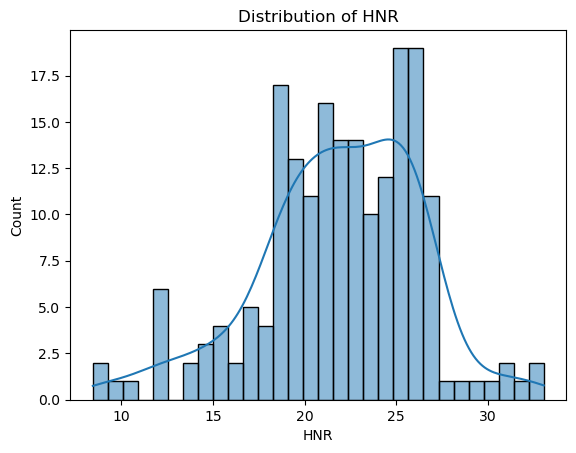

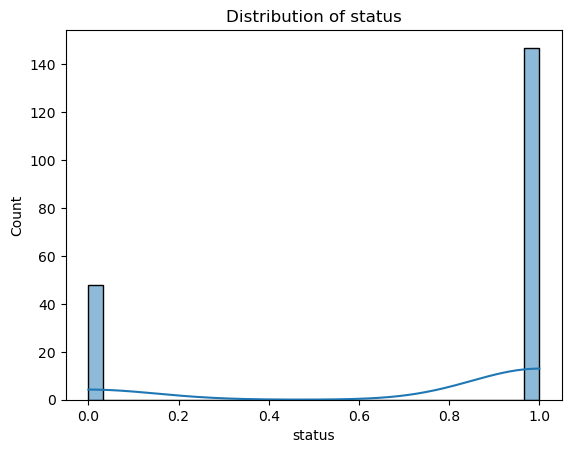

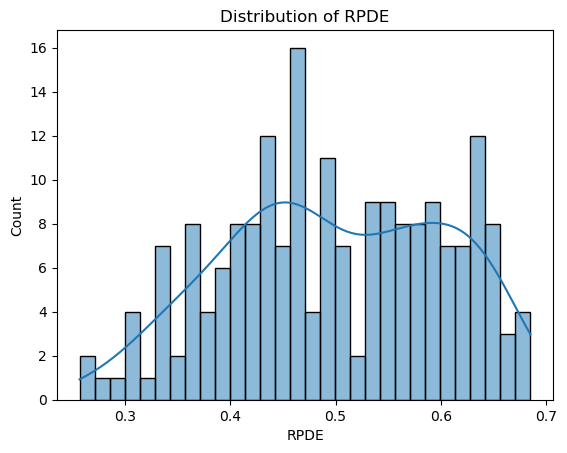

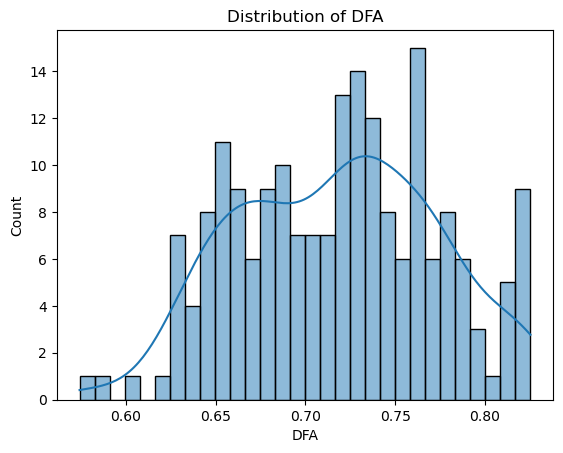

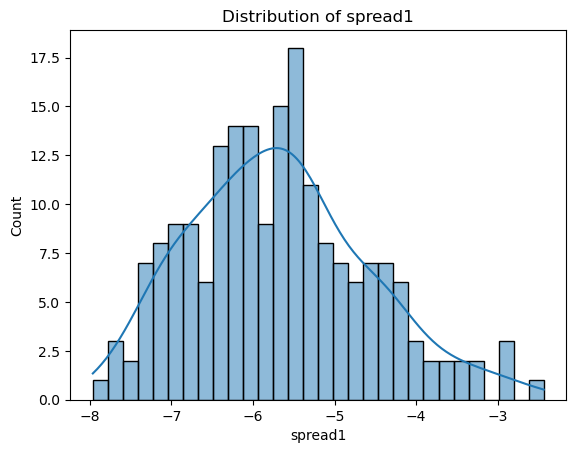

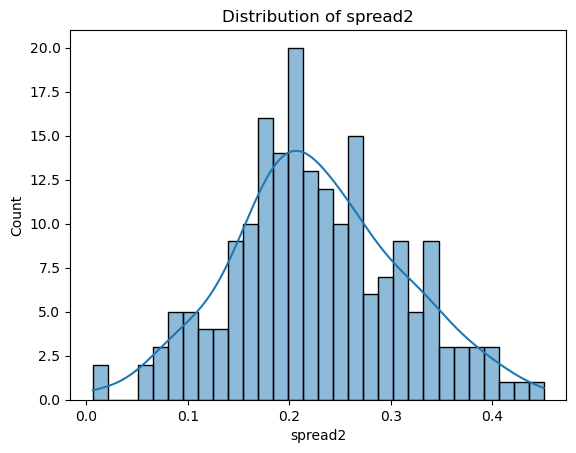

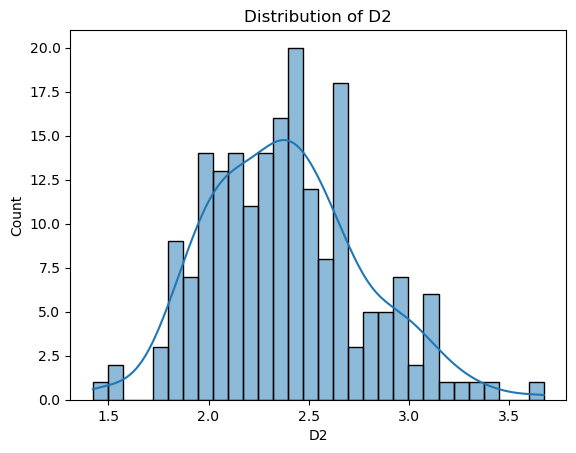

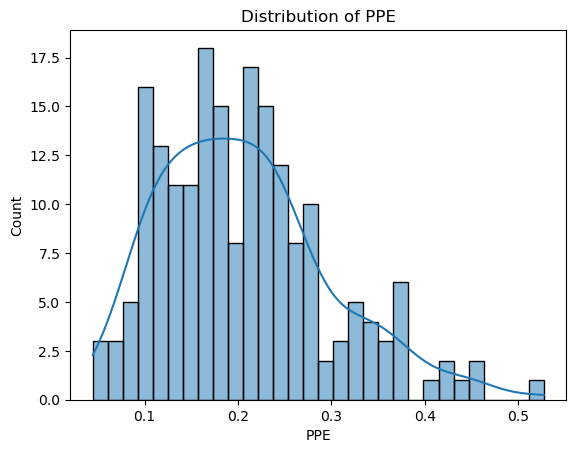


===== Bivariate Analysis =====


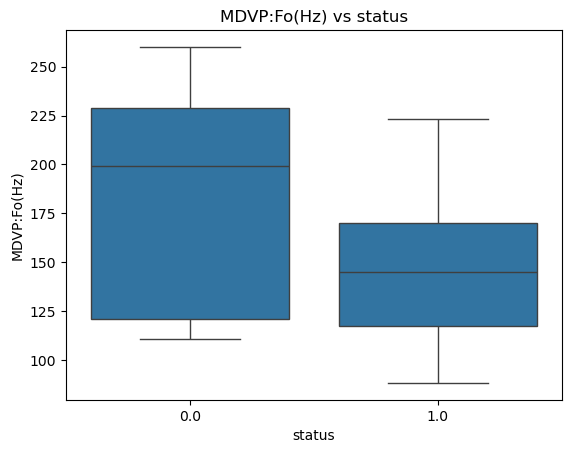

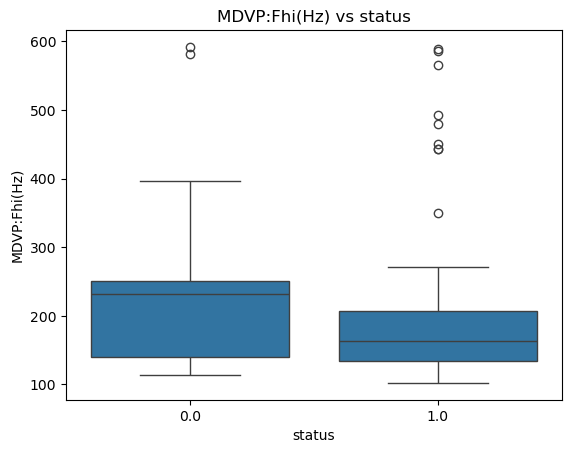

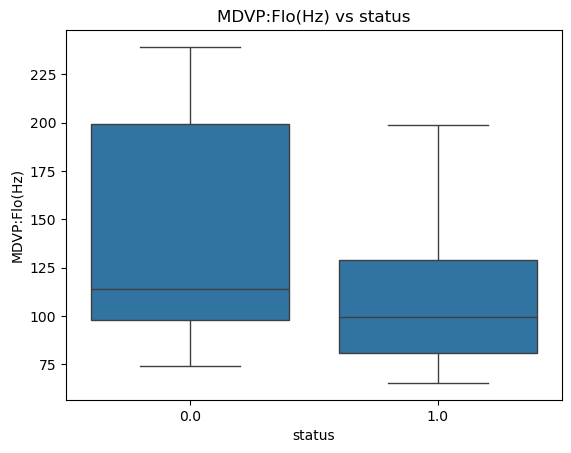

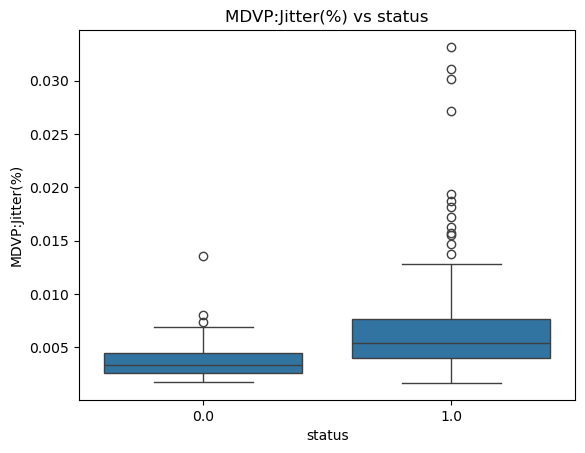

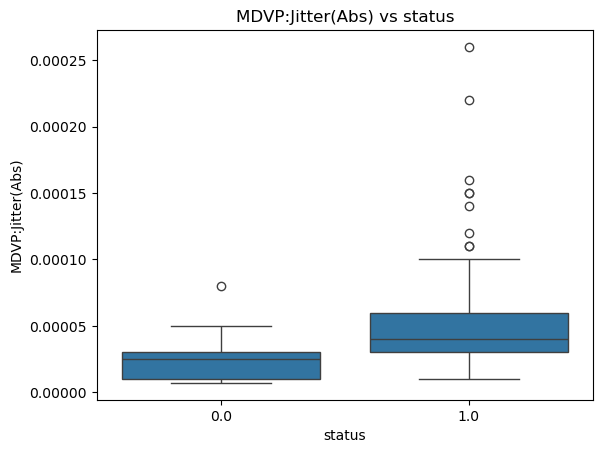

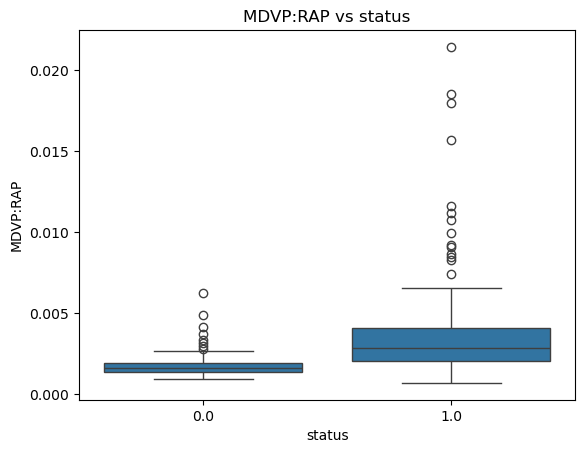

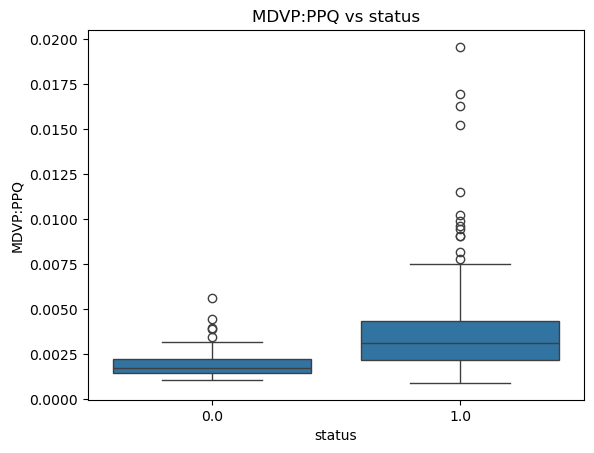

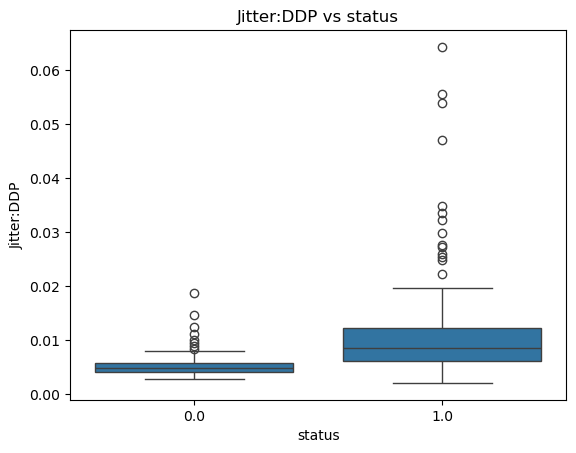

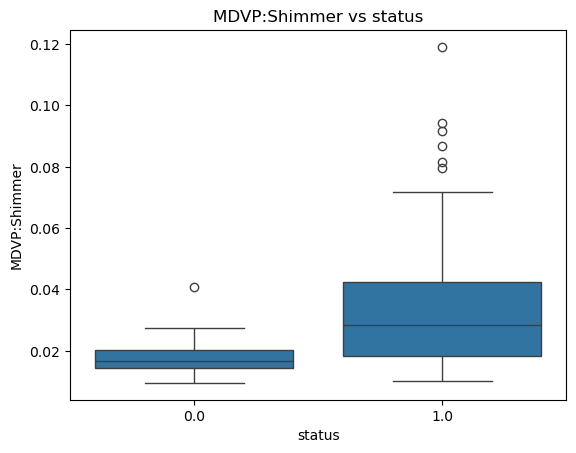

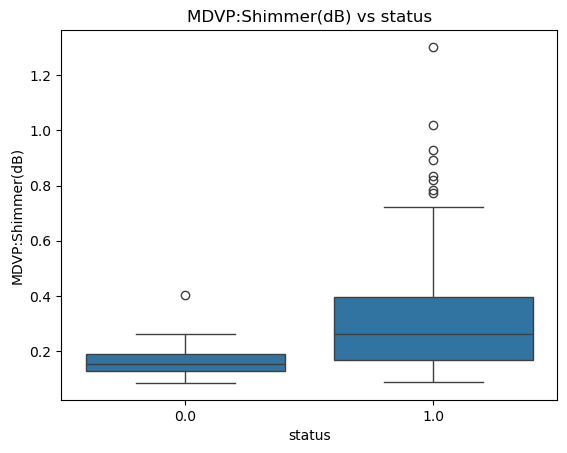

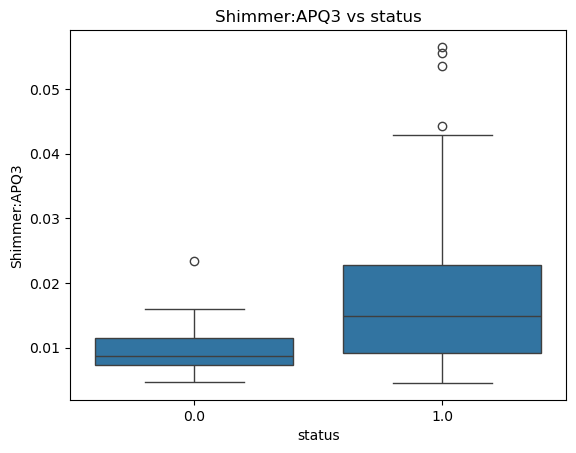

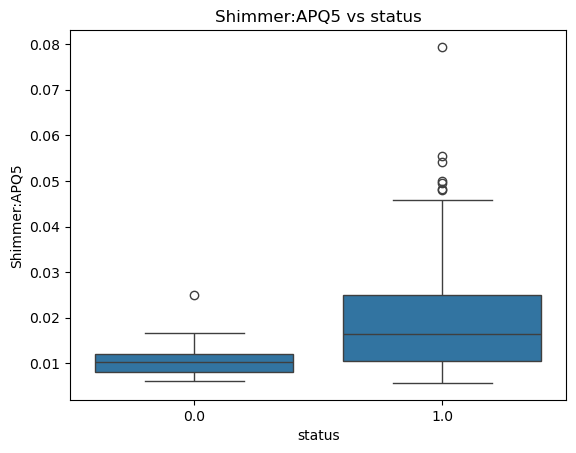

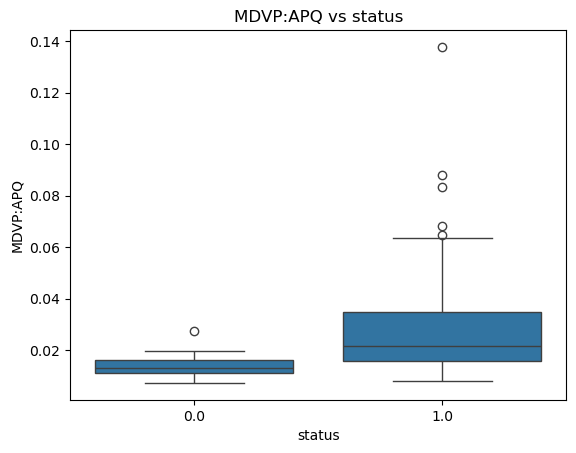

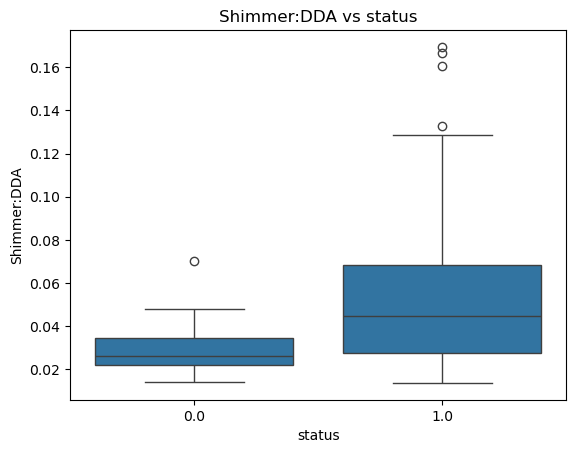

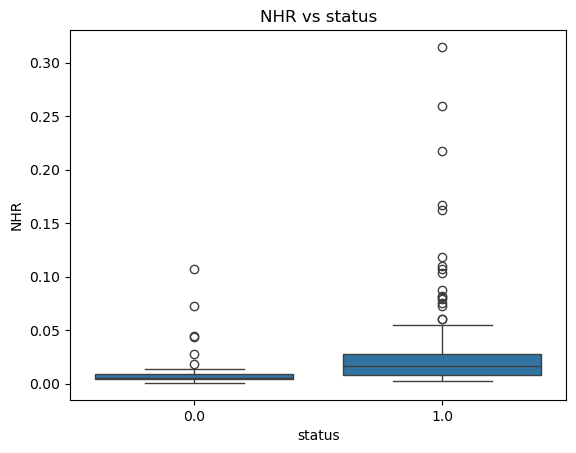

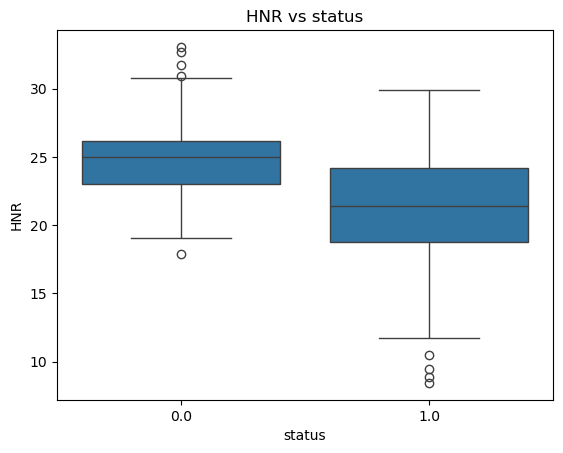

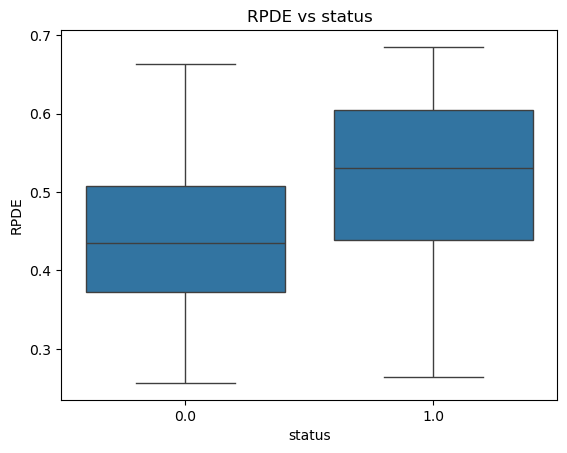

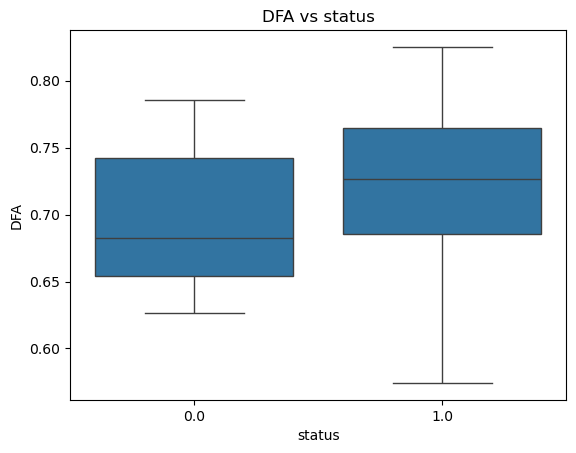

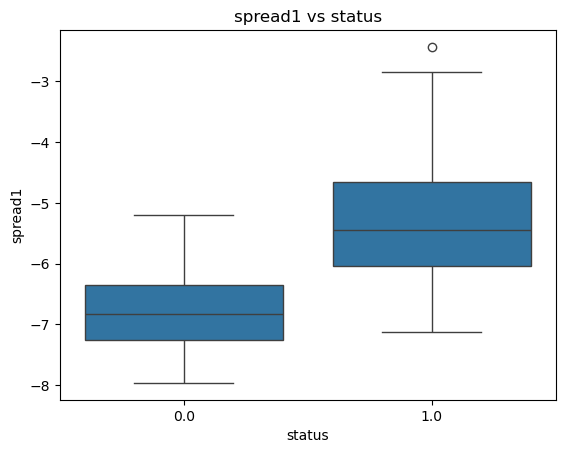

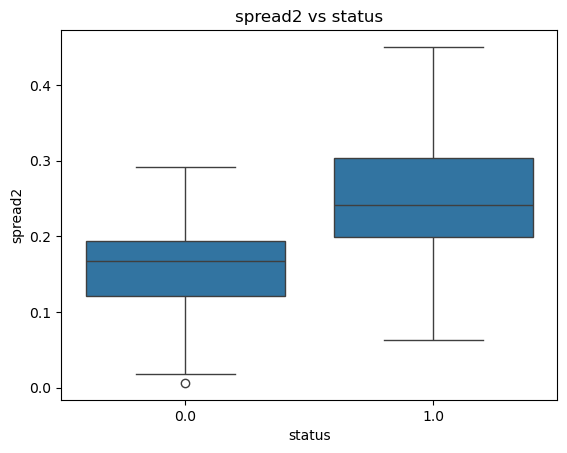

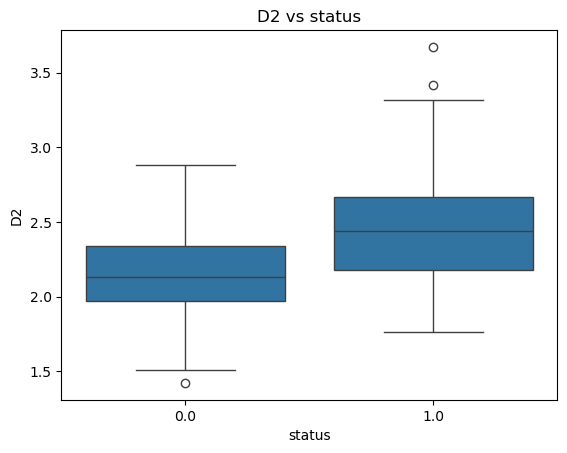

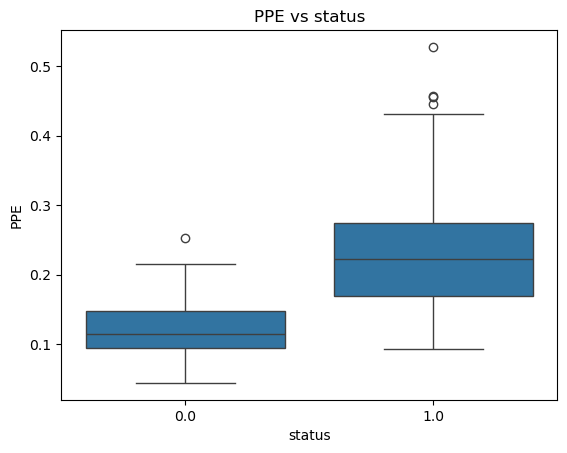


===== Correlation Heatmap =====


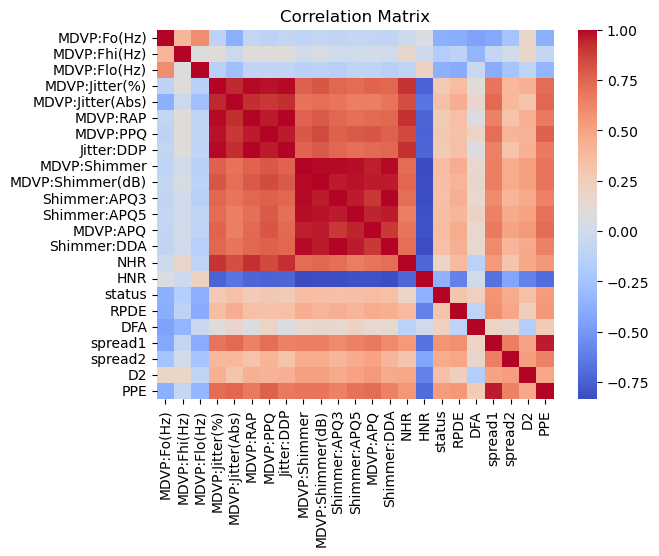

Logistic Regression: 0.8458
Random Forest: 0.9036
Gradient Boosting: 0.8909
Support Vector Machine: 0.8780
K-Nearest Neighbors: 0.9101
Decision Tree: 0.8524
XGBoost: 0.9036
Best Model: K-Nearest Neighbors
Best Params: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        10
         1.0       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



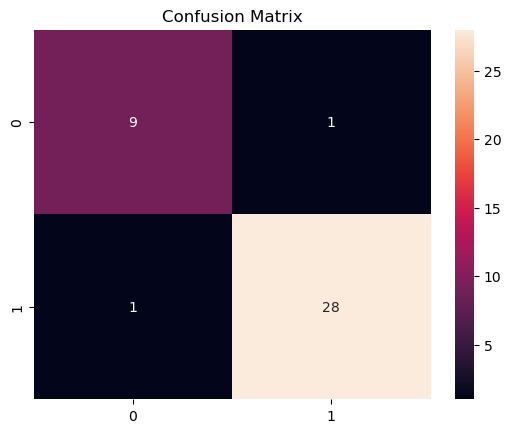

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# 1. Define the problem
def define_problem():
    problem_statement = "Predict the likelihood of Parkinson's disease based on voice measurements."
    assumptions = ["All features except 'name' contribute to predictions.", "Dataset is balanced and well-labeled."]
    current_solution = "Manual diagnosis by specialists."
    benefits = "Early and accurate predictions to support healthcare decisions."
    return problem_statement, assumptions, current_solution, benefits

# 2. Prepare the Data - EDA
def perform_eda(df, target_column=None):
    print("===== Exploratory Data Analysis =====\n")
    
    # Data Overview
    print("Data Overview:")
    print(df.info())
    print("\nSummary Statistics:")
    print(df.describe())
    
    # Check for missing values
    print("\nMissing Values:\n", df.isnull().sum())
    
    # Check for class imbalance
    if target_column:
        print("\nClass Distribution:")
        print(df[target_column].value_counts(normalize=True) * 100)
        sns.countplot(data=df, x=target_column)
        plt.title("Class Distribution")
        plt.show()
    
    # Univariate Analysis
    print("\n===== Univariate Analysis =====")
    for column in df.select_dtypes(include=['float64']).columns:
        sns.histplot(df[column], kde=True, bins=30)
        plt.title(f"Distribution of {column}")
        plt.show()
    
    # Bivariate Analysis
    print("\n===== Bivariate Analysis =====")
    if target_column:
        for column in df.select_dtypes(include=['float64']).columns:
            if column != target_column:
                sns.boxplot(data=df, x=target_column, y=column)
                plt.title(f"{column} vs {target_column}")
                plt.show()
    
    # Correlation Heatmap
    print("\n===== Correlation Heatmap =====")
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title("Correlation Matrix")
    plt.show()

# 2.2 Data Cleaning and Transformation
# 2.2 Data Cleaning and Transformation
def clean_data(df):
    # Remove the 'name' column
    if "name" in df.columns:
        df = df.drop(columns=["name"])  # Drop the 'name' column
    
    # Handle missing values
    imputer = SimpleImputer(strategy='mean')  # Adjust the strategy if needed
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    return df

def sample_data(df, target_column):
    df = df.sample(frac=1).reset_index(drop=True)  # Shuffle data
    X = df.drop(columns=[target_column])
    y = df[target_column]
    return train_test_split(X, y, test_size=0.2, random_state=42)

def transform_data(X_train, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

# 3. Spot Check Algorithms
def evaluate_algorithms(X_train, y_train):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "Support Vector Machine": SVC(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "XGBoost": XGBClassifier()
    }
    results = {}
    for name, model in models.items():
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
        results[name] = np.mean(cv_scores)
        print(f"{name}: {np.mean(cv_scores):.4f}")
    return results

# 4. Improve Results
def tune_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print("Best Params:", grid_search.best_params_)
    return grid_search.best_estimator_

def ensemble_methods(X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    gb.fit(X_train, y_train)
    rf_preds = rf.predict(X_test)
    gb_preds = gb.predict(X_test)
    ensemble_preds = (rf_preds + gb_preds) // 2  # Modify blending logic if necessary
    print("Ensemble Accuracy:", accuracy_score(y_test, ensemble_preds))

# 5. Finalize Project
def present_results(model, X_test, y_test):
    preds = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, preds))
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.show()

# Main Workflow
if __name__ == "__main__":
    # Define the problem
    problem, assumptions, solution, benefits = define_problem()
    print("Problem:", problem)
    print("Assumptions:", assumptions)
    print("Current Solution:", solution)
    print("Benefits of Model:", benefits)

    # Load the dataset
    data_file = "parkinsons.csv"  # Replace with your dataset path
    df = pd.read_csv(data_file)
    
    # Clean and transform the data
    target = "status"  # Replace with the correct target column name
    df = clean_data(df)  # Clean the data (removes the 'name' column)
    
    # Perform EDA
    perform_eda(df, target_column=target)
    
    # Split and transform the data
    X_train, X_test, y_train, y_test = sample_data(df, target)
    X_train, X_test = transform_data(X_train, X_test)
    
    # Evaluate models and improve results
    results = evaluate_algorithms(X_train, y_train)
    best_model_name = max(results, key=results.get)
    print(f"Best Model: {best_model_name}")
    
    # Use the best model and tune it
    model = KNeighborsClassifier()  # Best-performing model (KNN in this case)
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'metric': ['euclidean', 'manhattan']
    }

    # Tune the model using grid search
    best_model = tune_model(model, param_grid, X_train, y_train)

    # Finalize the project
    present_results(best_model, X_test, y_test)
